<a href="https://colab.research.google.com/github/sravanibandreddy/deep-learning/blob/main/dl_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a Recurrent Neural Network for	IMDB	Movie review classification problem.

25000 train sequences
25000 test sequences
pad sequences(sample x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 181ms/step - accuracy: 0.5497 - loss: 0.6837 - val_accuracy: 0.7286 - val_loss: 0.5605
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - accuracy: 0.7965 - loss: 0.4724 - val_accuracy: 0.8198 - val_loss: 0.4302
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.8639 - loss: 0.3363 - val_accuracy: 0.7744 - val_loss: 0.4628
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.9002 - loss: 0.2566 - val_accuracy: 0.7828 - val_loss: 0.4916
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - accuracy: 0.9293 - loss: 0.1915 - val_accuracy: 0.8316 - val_loss: 0.3966
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.9606 - loss: 0.1185 - val_accuracy: 0.8264 - val_loss: 0.4767
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.9770 - loss: 0.075

<Figure size 640x480 with 0 Axes>

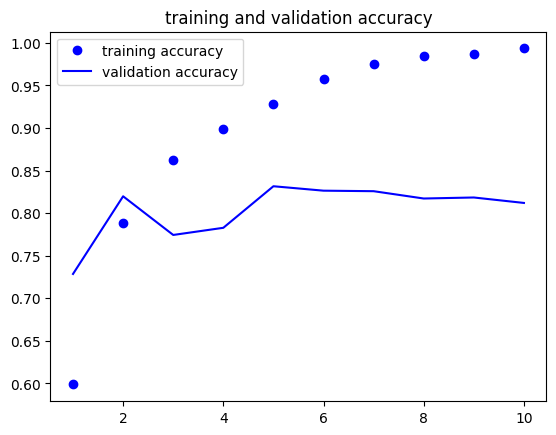

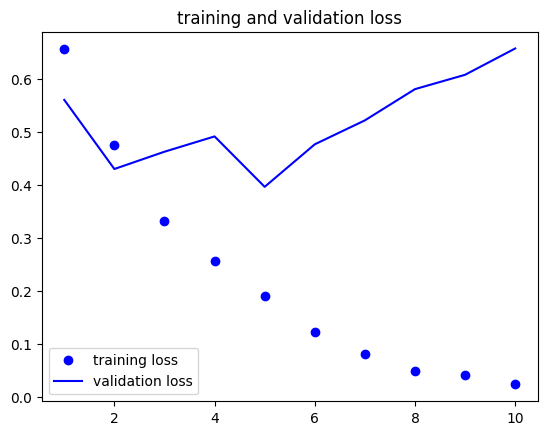

<Figure size 640x480 with 0 Axes>

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = max_features)
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')

print ('pad sequences(sample x time)')

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = sequence.pad_sequences(x_train,maxlen = maxlen)
x_test = sequence.pad_sequences(x_test,maxlen = maxlen)
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)


from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = 'sigmoid'))


model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 10,batch_size = 128,validation_split = 0.2)
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs , accuracy , 'bo', label = 'training accuracy')
plt.plot(epochs,val_accuracy,'b' ,label = 'validation accuracy')
plt.title("training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs , loss , 'bo', label = 'training loss')
plt.plot(epochs,val_loss,'b' ,label = 'validation loss')
plt.title("training and validation loss")
plt.legend()
plt.figure()

